In [1]:
!pip install numpy


In [2]:
!pip install tensorflow

In [4]:
!pip install numpy==1.21.6


     ---------------------------------------- 14.0/14.0 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\family\\anaconda3\\Lib\\site-packages\\~-mpy.libs\\libscipy_openblas64_-caad452230ae4ddb57899b8b3a33c55c.dll'
Consider using the `--user` option or check the permissions.



In [1]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.3
anaconda-client               1.11.1
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt 

# Importing libraries and setting the parameters

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

# random seed for reproducibility
tf.random.set_seed(42)

#  parameter
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2


# loading and preprocessing data

In [2]:
def create_datasets(data_dir):
    train_ds = image_dataset_from_directory(
        data_dir,
        validation_split=VALIDATION_SPLIT,
        subset="training",
        seed=42,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE
    )
    
    val_ds = image_dataset_from_directory(
        data_dir,
        validation_split=VALIDATION_SPLIT,
        subset="validation",
        seed=42,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE
    )
    
    class_names = train_ds.class_names
    print(f"Class names: {class_names}")
    
    return train_ds, val_ds, class_names

data_dir = data_dir = r"C:\Users\family\Desktop\AIPRO2\dataset"

train_ds, val_ds, class_names = create_datasets(data_dir)

# Enable prefetching
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)


Found 457 files belonging to 3 classes.
Using 366 files for training.
Found 457 files belonging to 3 classes.
Using 91 files for validation.
Class names: ['class1', 'class2', 'class3']


# defining the model

In [3]:
def create_model(num_classes):
    model = models.Sequential([
        # Data augmentation
        tf.keras.Sequential([
            layers.RandomRotation(0.2),
            layers.RandomZoom(0.2),
            layers.RandomFlip("horizontal"),
            layers.RandomBrightness(0.2),
            layers.RandomContrast(0.2),
        ]),
        layers.Rescaling(1./255),
        layers.Conv2D(32, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = create_model(num_classes=len(class_names))


# Training

In [4]:
def train_model(model, train_ds, val_ds, epochs=20):
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=[early_stopping]
    )
    return history

history = train_model(model, train_ds, val_ds)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4401 - loss: 2.4580 - val_accuracy: 0.6154 - val_loss: 0.9351
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6139 - loss: 0.9328 - val_accuracy: 0.6154 - val_loss: 0.8885
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5995 - loss: 0.8889 - val_accuracy: 0.6154 - val_loss: 0.8714
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5805 - loss: 0.9023 - val_accuracy: 0.6154 - val_loss: 0.8211
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6208 - loss: 0.8040 - val_accuracy: 0.6703 - val_loss: 0.7347
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6631 - loss: 0.7541 - val_accuracy: 0.7143 - val_loss: 0.6888
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6914 - loss: 0.6974 - val_accuracy: 0.7692 - val_loss: 0.6398
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7119 - loss: 0.6974 - val_accuracy: 0.7253 - val_loss:

# Evaluating metrics

In [5]:
def evaluate_metrics(model, val_ds, class_names):
    y_true = np.concatenate([y for _, y in val_ds], axis=0)
    y_pred_probs = model.predict(val_ds)
    y_pred = np.argmax(y_pred_probs, axis=1)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

evaluate_metrics(model, val_ds, class_names)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step

Classification Report:
              precision    recall  f1-score   support

      class1       0.66      0.70      0.68        56
      class2       0.39      0.38      0.38        24
      class3       0.22      0.18      0.20        11

    accuracy                           0.55        91
   macro avg       0.42      0.42      0.42        91
weighted avg       0.54      0.55      0.54        91


Confusion Matrix:
[[39 12  5]
 [13  9  2]
 [ 7  2  2]]


# Plotting results

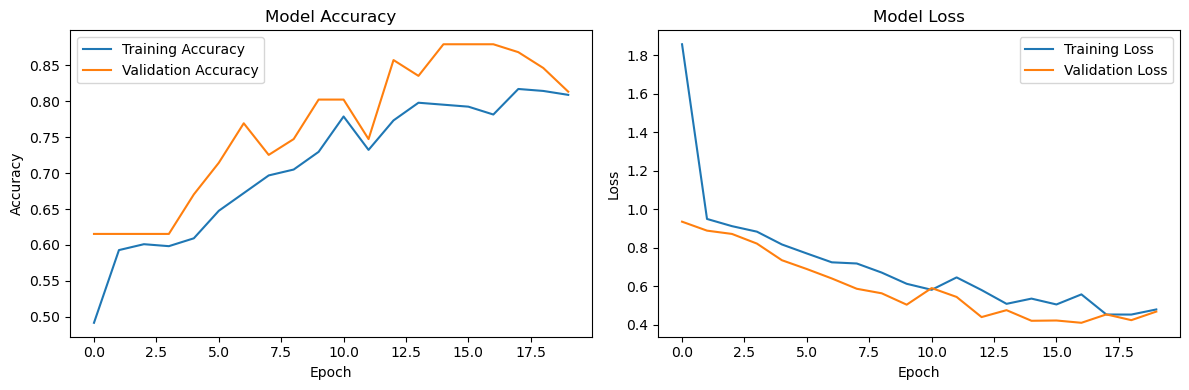

In [6]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(history)
